Вы работаете аналитиком в отделе по работе с просроченной задолженностью в финансовом департаменте SkyBank.

Одним из важнейших показателей, связанных со взысканием, являются банковские резервы. 

По закону банк должен резервировать средства по всем выданным кредитам. Работает это следующим образом. 
Когда клиент берет кредит, банк резервирует определенный процент от выделенной суммы. 
Банк не может тратить эти деньги, а только хранит их в виде наличности или на счете центрального банка. 
Если клиент вовремя не выплачивает кредит, то эта сумма увеличивается. И чем больше просрочка, тем больше процент. 
Такие меры нужны для большей стабильности банковской системы. Они удерживают банки от выдачи рискованных кредитов. 
А центральный банк регулирует процент обязательного резерва и может регулировать количество выдаваемых кредитов.

Полное соответствие между количеством дней просрочки и коэффициентом резервирования содержится в таблице bucket_coeff.csv.

Информация о кредитах и просрочках (на 1 августа) хранится в файле Client_Data_01082022.csv.

Расшифровка типов продукта хранится в файле credit_type.csv

Сегодня 1 августа 2022 года. Рассчитайте суммарный объем резервов из расчета на 1 августа 2022 года.

In [359]:
import pandas as pd

In [360]:
df = pd.read_csv('Client_Data_01082022.csv', sep = ';', parse_dates = ['last_inst_payment'], dayfirst = True)
df.head()

,id_credit,last_inst_payment,amt_instalment,id_credit_type
0,237789,2022-05-04,25669,888
1,238348,2022-02-18,5271,246
2,238164,2022-05-06,33732,246
3,237613,2022-03-14,6108,246
4,237745,2022-02-05,4917,888


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_credit          1474 non-null   int64         
 1   last_inst_payment  1474 non-null   datetime64[ns]
 2   amt_instalment     1474 non-null   int64         
 3   id_credit_type     1474 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 46.2 KB


In [362]:
from datetime import datetime

In [363]:
today = '01.08.2022'

In [364]:
today = datetime.strptime(today, '%d.%m.%Y')

In [365]:
today

datetime.datetime(2022, 8, 1, 0, 0)

In [366]:
df['delay'] = today - df['last_inst_payment']

In [367]:
df

,id_credit,last_inst_payment,amt_instalment,id_credit_type,delay
0,237789,2022-05-04,25669,888,89 days
1,238348,2022-02-18,5271,246,164 days
2,238164,2022-05-06,33732,246,87 days
3,237613,2022-03-14,6108,246,140 days
4,237745,2022-02-05,4917,888,177 days
...,...,...,...,...,...
1469,238698,2022-06-04,6238,246,58 days
1470,238938,2022-03-29,28495,247,125 days
1471,238378,2022-03-04,9045,1028,150 days
1472,238794,2022-04-03,8809,246,120 days


In [368]:
import numpy as np

In [369]:
df['delay'] = (df['delay'] / np.timedelta64(1, 'D')).astype(int)

In [370]:
df.head()

,id_credit,last_inst_payment,amt_instalment,id_credit_type,delay
0,237789,2022-05-04,25669,888,89
1,238348,2022-02-18,5271,246,164
2,238164,2022-05-06,33732,246,87
3,237613,2022-03-14,6108,246,140
4,237745,2022-02-05,4917,888,177


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_credit          1474 non-null   int64         
 1   last_inst_payment  1474 non-null   datetime64[ns]
 2   amt_instalment     1474 non-null   int64         
 3   id_credit_type     1474 non-null   int64         
 4   delay              1474 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(3)
memory usage: 51.9 KB


In [372]:
coef = pd.read_csv('bucket_coeff.csv', sep = ';')
coef

,id_bucket,range_bucket,coeff,valid_to
0,1,0-15,"0,05",01.01.3000
1,2,16-30,"0,25",01.01.3000
2,3,31-60,"0,33",01.01.3000
3,4,61-90,"0,6",01.01.3000
4,5,91-120,"0,75",01.01.3000
5,6,121-150,"0,87",01.01.3000
6,7,151-180,"0,94",01.01.3000
7,8,181+,1,01.01.3000
8,1,0-15,"0,047",01.07.2022
9,2,16-30,"0,26",01.07.2022


In [374]:
def reserve_coeff(delay):
    if delay in np.arange(0,16):
        return 0.05
    elif delay in np.arange(16,31):
        return 0.25
    elif delay in np.arange(31,61):
        return 0.33
    elif delay in np.arange(61,91):
        return 0.6
    elif delay in np.arange(91,121):
        return 0.75
    elif delay in np.arange(121,151):
        return 0.87
    elif delay in np.arange(151,181):
        return 0.94
    else:
        return 1

In [375]:
df['reserve_coeff'] = df['delay'].apply(reserve_coeff)

In [376]:
df

,id_credit,last_inst_payment,amt_instalment,id_credit_type,delay,reserve_coeff
0,237789,2022-05-04,25669,888,89,0.60
1,238348,2022-02-18,5271,246,164,0.94
2,238164,2022-05-06,33732,246,87,0.60
3,237613,2022-03-14,6108,246,140,0.87
4,237745,2022-02-05,4917,888,177,0.94
...,...,...,...,...,...,...
1469,238698,2022-06-04,6238,246,58,0.33
1470,238938,2022-03-29,28495,247,125,0.87
1471,238378,2022-03-04,9045,1028,150,0.87
1472,238794,2022-04-03,8809,246,120,0.75


In [377]:
df['reserve'] = df['amt_instalment'] * df['reserve_coeff']

In [378]:
df

,id_credit,last_inst_payment,amt_instalment,id_credit_type,delay,reserve_coeff,reserve
0,237789,2022-05-04,25669,888,89,0.60,15401.40
1,238348,2022-02-18,5271,246,164,0.94,4954.74
2,238164,2022-05-06,33732,246,87,0.60,20239.20
3,237613,2022-03-14,6108,246,140,0.87,5313.96
4,237745,2022-02-05,4917,888,177,0.94,4621.98
...,...,...,...,...,...,...,...
1469,238698,2022-06-04,6238,246,58,0.33,2058.54
1470,238938,2022-03-29,28495,247,125,0.87,24790.65
1471,238378,2022-03-04,9045,1028,150,0.87,7869.15
1472,238794,2022-04-03,8809,246,120,0.75,6606.75


In [336]:
sum_reserve_aug_1 = df['reserve'].sum()
sum_reserve_aug_1

16844393.740000002

In [337]:
#сумма резерва на 1 августа 2022 составила 16 844 393.74 руб.

Напишите функцию, которая будет на вход брать отчетную дату (например, 1 августа 2022 года) и датафрейм по аналогии с файлом Client_Data_01082022 и будет рассчитывать суммарный объем банковских резервов на отчетную дату.

In [338]:
def sum_reserve(date_needed, dataframe):
    
    today = datetime.strptime(date_needed, '%d.%m.%Y')
    
    dataframe['delay'] = today - dataframe['last_inst_payment']
    dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
    
    def reserve_coeff(delay):
        if delay in np.arange(0,16):
            return 0.05
        elif delay in np.arange(16,31):
            return 0.25
        elif delay in np.arange(31,61):
            return 0.33
        elif delay in np.arange(61,91):
            return 0.6
        elif delay in np.arange(91,121):
            return 0.75
        elif delay in np.arange(121,151):
            return 0.87
        elif delay in np.arange(151,181):
            return 0.94
        else:
            return 1
        
    dataframe['reserve_coeff'] = dataframe['delay'].apply(reserve_coeff)
    dataframe['reserve'] = dataframe['amt_instalment'] * dataframe['reserve_coeff']
    
    sum_reserve = dataframe['reserve'].sum()
    
    return sum_reserve

Предположим худший возможный сценарий: начиная с 1 августа больше никто не оплатил ни копейки по своим кредитам 
в связи с макроэкономической ситуацией. Постройте график суммарных резервов для набора отчетных дат от 1 до 30 августа 
(включительно) и оцените абсолютный и процентный прирост резервов за месяц.

In [340]:
august = []

from dateutil import rrule

a = '01.08.2022'
b = '30.08.2022'

for dt in rrule.rrule(rrule.DAILY,
                      dtstart=datetime.strptime(a, '%d.%m.%Y'),
                      until=datetime.strptime(b, '%d.%m.%Y')):
    august.append(dt.strftime('%d.%m.%Y'))

In [341]:
august

['01.08.2022',
 '02.08.2022',
 '03.08.2022',
 '04.08.2022',
 '05.08.2022',
 '06.08.2022',
 '07.08.2022',
 '08.08.2022',
 '09.08.2022',
 '10.08.2022',
 '11.08.2022',
 '12.08.2022',
 '13.08.2022',
 '14.08.2022',
 '15.08.2022',
 '16.08.2022',
 '17.08.2022',
 '18.08.2022',
 '19.08.2022',
 '20.08.2022',
 '21.08.2022',
 '22.08.2022',
 '23.08.2022',
 '24.08.2022',
 '25.08.2022',
 '26.08.2022',
 '27.08.2022',
 '28.08.2022',
 '29.08.2022',
 '30.08.2022']

In [342]:
df2 = pd.read_csv('Client_Data_01082022.csv', sep = ';', parse_dates = ['last_inst_payment'], dayfirst = True)
df2.head()

,id_credit,last_inst_payment,amt_instalment,id_credit_type
0,237789,2022-05-04,25669,888
1,238348,2022-02-18,5271,246
2,238164,2022-05-06,33732,246
3,237613,2022-03-14,6108,246
4,237745,2022-02-05,4917,888


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_credit          1474 non-null   int64         
 1   last_inst_payment  1474 non-null   datetime64[ns]
 2   amt_instalment     1474 non-null   int64         
 3   id_credit_type     1474 non-null   int64         
 4   delay              1474 non-null   int32         
 5   reserve_coeff      1474 non-null   float64       
 6   reserve            1474 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 75.0 KB


In [344]:
sum_reserve_list = []

for i in range(len(august)):
    sum_reserve_list.append(sum_reserve(august[i], df2))

In [345]:
sum_reserve_list

[16844393.740000002,
 16937313.39,
 17028599.369999997,
 17185518.35,
 17286900.759999998,
 17416518.48,
 17576541.52,
 17707741.19,
 17820412.0,
 17935632.299999997,
 18054121.34,
 18210191.19,
 18365082.31,
 18518291.64,
 18669781.32,
 18826306.2,
 18978210.529999997,
 19046741.68,
 19154891.05,
 19256671.33,
 19349645.44,
 19403446.17,
 19474297.83,
 19547730.32,
 19633020.29,
 19740956.54,
 19833274.58,
 19933446.639999997,
 20060256.709999997,
 20163024.490000002]

In [346]:
import matplotlib.pyplot as plt
%matplotlib inline 

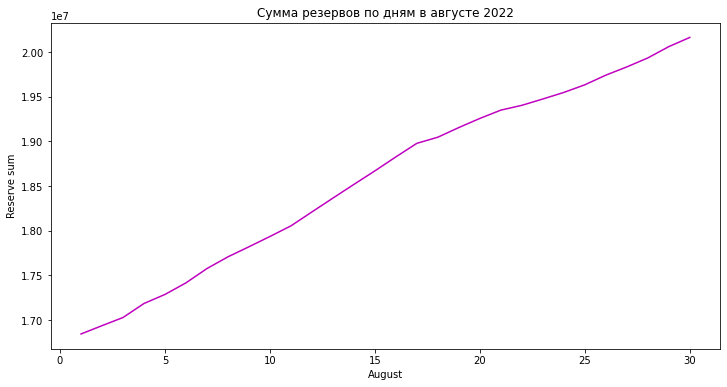

In [347]:
x = np.arange(1,31)
y = sum_reserve_list

plt.figure(figsize=(12,6))
plt.title('Сумма резервов по дням в августе 2022')
plt.plot(x, y, color='m')
plt.xlabel('August')
plt.ylabel('Reserve sum')
plt.show()

In [348]:
absolute_growth = sum_reserve_list[-1] - sum_reserve_list[0]
absolute_growth

3318630.75

In [349]:
percent_growth = round((1 - sum_reserve_list[0] / sum_reserve_list[-1]), 4)*100
percent_growth

16.46

In [350]:
reserves = pd.DataFrame(august)
reserves

,0
0,01.08.2022
1,02.08.2022
2,03.08.2022
3,04.08.2022
4,05.08.2022
5,06.08.2022
6,07.08.2022
7,08.08.2022
8,09.08.2022
9,10.08.2022


In [351]:
reserves['sum_reserves'] = sum_reserve_list
reserves

,0,sum_reserves
0,01.08.2022,16844393.74
1,02.08.2022,16937313.39
2,03.08.2022,17028599.37
3,04.08.2022,17185518.35
4,05.08.2022,17286900.76
5,06.08.2022,17416518.48
6,07.08.2022,17576541.52
7,08.08.2022,17707741.19
8,09.08.2022,17820412.00
9,10.08.2022,17935632.30


In [352]:
reserves.rename(columns={0 :'day'}, inplace = True)
reserves

,day,sum_reserves
0,01.08.2022,16844393.74
1,02.08.2022,16937313.39
2,03.08.2022,17028599.37
3,04.08.2022,17185518.35
4,05.08.2022,17286900.76
5,06.08.2022,17416518.48
6,07.08.2022,17576541.52
7,08.08.2022,17707741.19
8,09.08.2022,17820412.00
9,10.08.2022,17935632.30


In [353]:
reserves['absolute_growth'] = reserves['sum_reserves'] - reserves['sum_reserves'][0]
reserves

,day,sum_reserves,absolute_growth
0,01.08.2022,16844393.74,0.00
1,02.08.2022,16937313.39,92919.65
2,03.08.2022,17028599.37,184205.63
3,04.08.2022,17185518.35,341124.61
4,05.08.2022,17286900.76,442507.02
5,06.08.2022,17416518.48,572124.74
6,07.08.2022,17576541.52,732147.78
7,08.08.2022,17707741.19,863347.45
8,09.08.2022,17820412.00,976018.26
9,10.08.2022,17935632.30,1091238.56


In [354]:
reserves['percent_growth'] = round((1 - reserves['sum_reserves'][0] / reserves['sum_reserves']), 4)*100
reserves

,day,sum_reserves,absolute_growth,percent_growth
0,01.08.2022,16844393.74,0.00,0.00
1,02.08.2022,16937313.39,92919.65,0.55
2,03.08.2022,17028599.37,184205.63,1.08
3,04.08.2022,17185518.35,341124.61,1.98
4,05.08.2022,17286900.76,442507.02,2.56
5,06.08.2022,17416518.48,572124.74,3.28
6,07.08.2022,17576541.52,732147.78,4.17
7,08.08.2022,17707741.19,863347.45,4.88
8,09.08.2022,17820412.00,976018.26,5.48
9,10.08.2022,17935632.30,1091238.56,6.08


Постройте в питоне визуализации, которые помогут отследить размер резервов (например, в разрезе продукта или размера выданного кредита).

In [355]:
prod = pd.read_csv('credit_type.csv', sep = ';')
prod

,id_credit_type,name_credit_type
0,117,POS-special
1,118,POS-classic
2,119,POS-restruct
3,245,RC-experiment
4,246,RC
5,247,RC-special
6,248,RC-restruct
7,249,RC-new format
8,888,Cash-in classic
9,889,Cash-in restruct


In [356]:
df

,id_credit,last_inst_payment,amt_instalment,id_credit_type,delay,reserve_coeff,reserve
0,237789,2022-05-04,25669,888,89,0.60,15401.40
1,238348,2022-02-18,5271,246,164,0.94,4954.74
2,238164,2022-05-06,33732,246,87,0.60,20239.20
3,237613,2022-03-14,6108,246,140,0.87,5313.96
4,237745,2022-02-05,4917,888,177,0.94,4621.98
...,...,...,...,...,...,...,...
1469,238698,2022-06-04,6238,246,58,0.33,2058.54
1470,238938,2022-03-29,28495,247,125,0.87,24790.65
1471,238378,2022-03-04,9045,1028,150,0.87,7869.15
1472,238794,2022-04-03,8809,246,120,0.75,6606.75


In [357]:
df_prod = pd.merge(df, prod, on = 'id_credit_type')
df_prod

,id_credit,last_inst_payment,amt_instalment,id_credit_type,delay,reserve_coeff,reserve,name_credit_type
0,237789,2022-05-04,25669,888,89,0.60,15401.40,Cash-in classic
1,237745,2022-02-05,4917,888,177,0.94,4621.98,Cash-in classic
2,238099,2022-04-02,25896,888,121,0.87,22529.52,Cash-in classic
3,238298,2022-02-19,8941,888,163,0.94,8404.54,Cash-in classic
4,238973,2022-02-07,2157,888,175,0.94,2027.58,Cash-in classic
...,...,...,...,...,...,...,...,...
1469,238700,2022-04-17,17875,1026,106,0.75,13406.25,Autocredit-bail
1470,238929,2022-05-08,27838,1026,85,0.60,16702.80,Autocredit-bail
1471,238085,2022-07-19,27900,1026,13,0.05,1395.00,Autocredit-bail
1472,237953,2022-03-24,35428,1026,130,0.87,30822.36,Autocredit-bail


In [382]:
df_prod_gr = df_prod.groupby('name_credit_type')['reserve'].sum().reset_index()
df_prod_gr

,name_credit_type,reserve
0,Autocredit-bail,208726.61
1,Autocredit-classic,1978074.89
2,Autocredit-new,128910.28
3,Autocredit-restruct,791125.16
4,Autocredit-select,585994.90
5,Autocredit-special,288113.16
6,Cash-in classic,501811.59
7,Cash-in restruct,934851.33
8,POS-classic,2823597.57
9,POS-restruct,2065360.00


C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

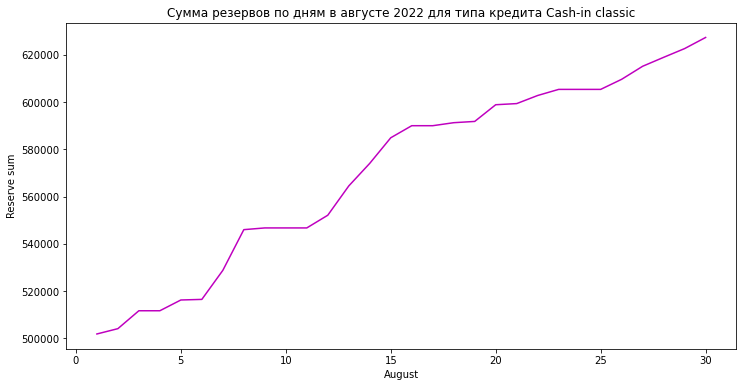

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

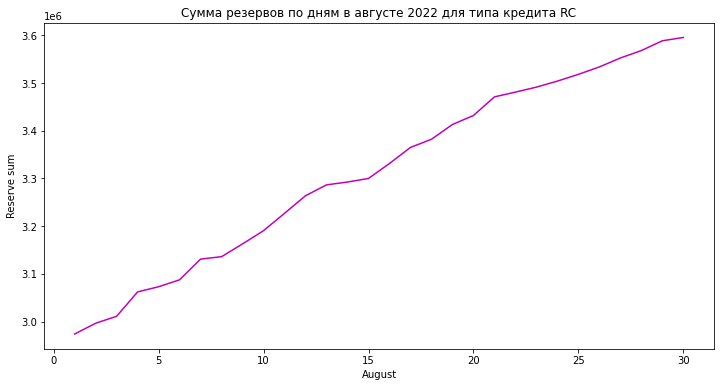

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

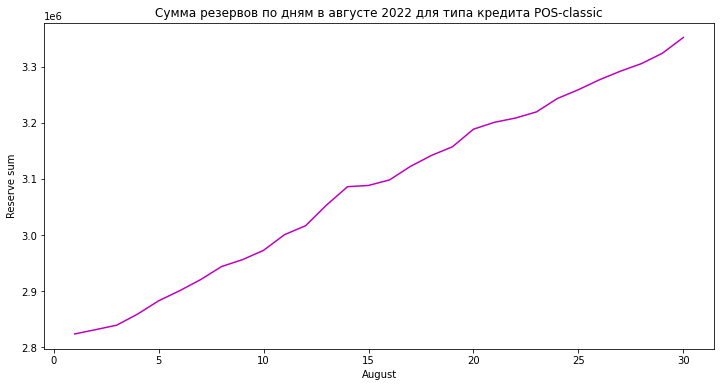

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

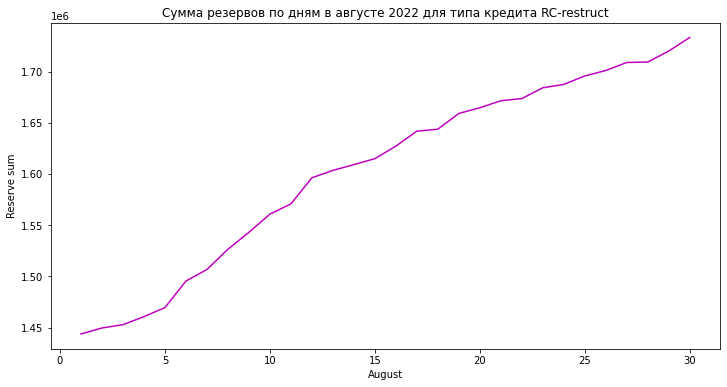

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

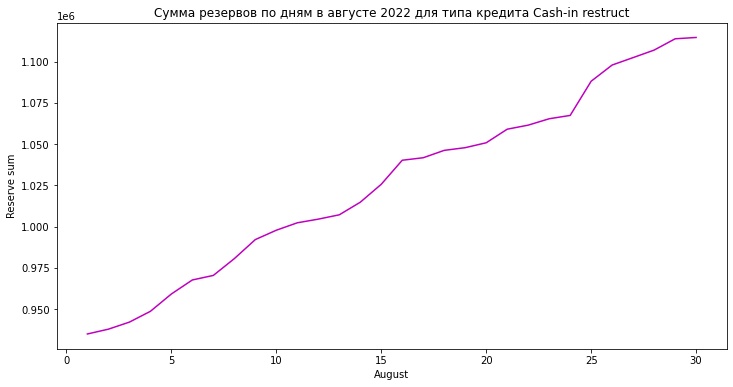

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

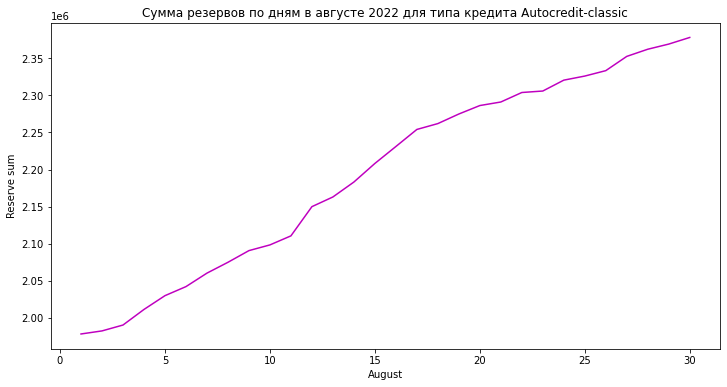

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

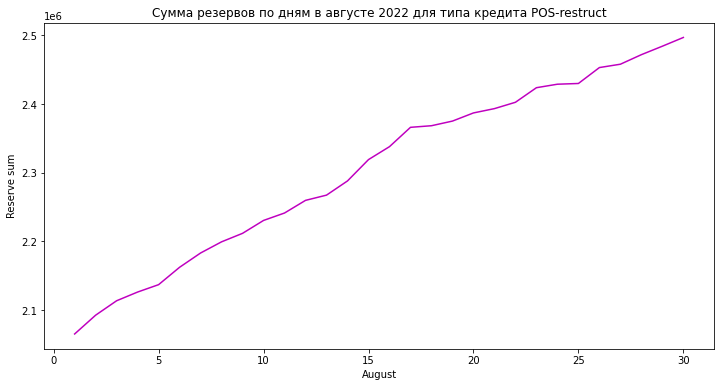

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

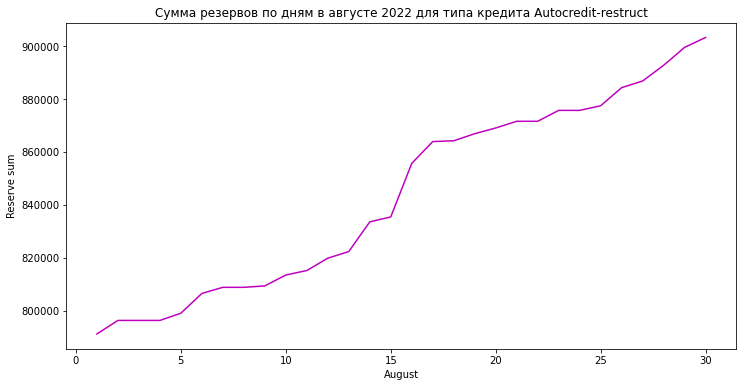

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

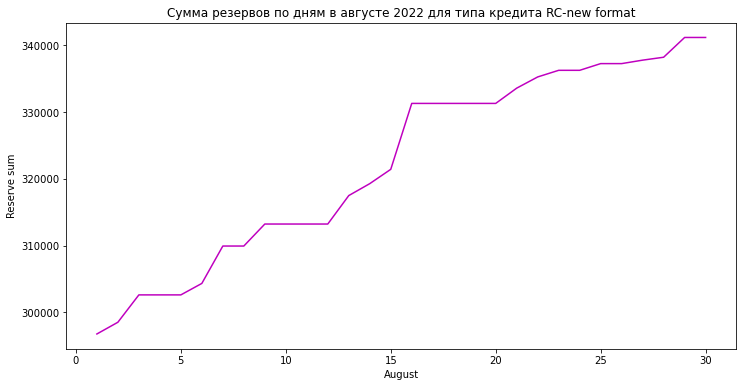

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

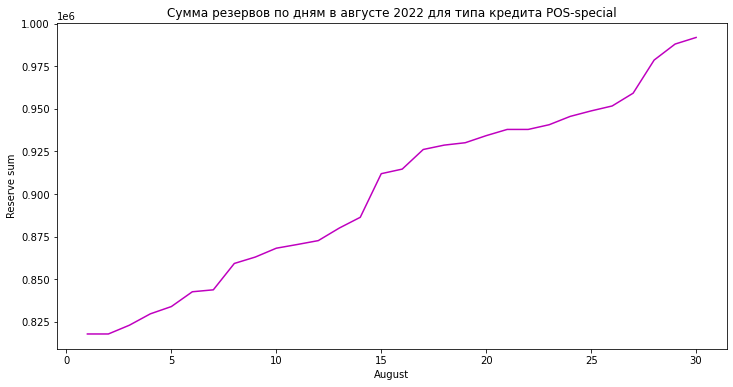

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

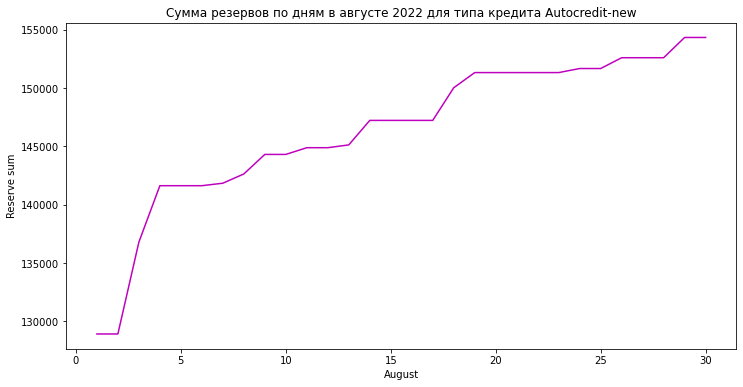

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

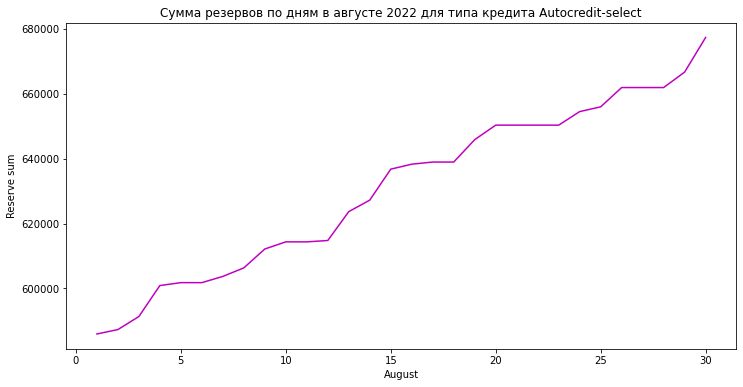

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

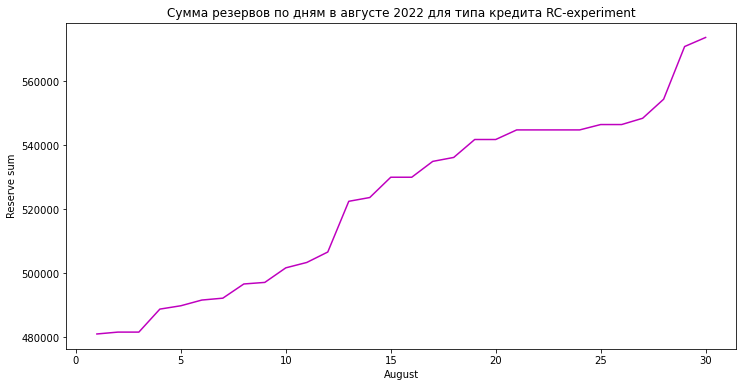

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

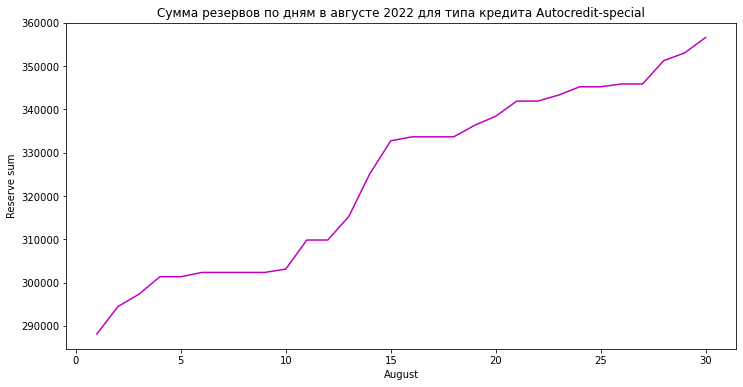

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

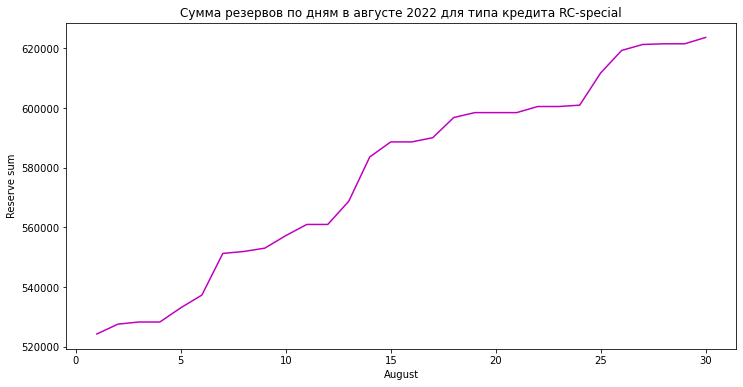

C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = today - dataframe['last_inst_payment']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['delay'] = (dataframe['delay'] / np.timedelta64(1, 'D')).astype(int)
C:\Users\ddgub\AppData\Local\Temp\ipykernel_3192\107776389.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

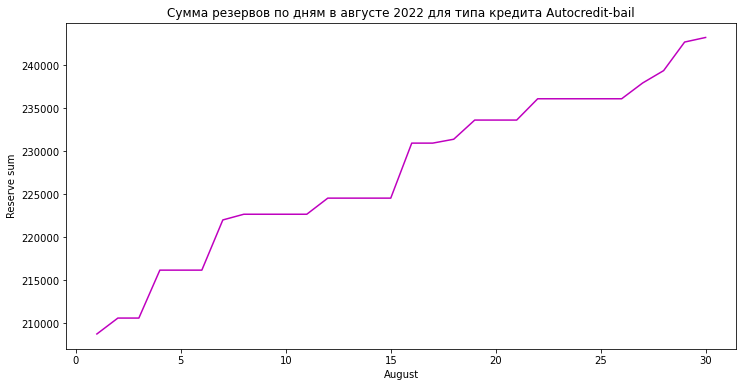

In [358]:
for credit in df_prod['name_credit_type'].unique():
    sum_reserve_list_credit = []

    for i in range(len(august)):
        sum_reserve_list_credit.append(sum_reserve(august[i], df_prod[df_prod['name_credit_type'] == credit]))
        
    x = np.arange(1,31)
    y = sum_reserve_list_credit

    plt.figure(figsize=(12,6))
    plt.title(f'Сумма резервов по дням в августе 2022 для типа кредита {credit}')
    plt.plot(x, y, color='m')
    plt.xlabel('August')
    plt.ylabel('Reserve sum')
    plt.show()
    